### Import required modules and load data file

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('breast_cancer.txt',names=['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin ','Normal Nucleoli','Mitoses','Class'])
data.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Cleaning

In [112]:
data.set_index('id',inplace=True)
#Replacing unknown values in a column with NaN
data['Bare Nuclei']=data['Bare Nuclei'].replace('?',np.NaN)
#Dropping the rows with missing data
data.dropna(subset=['Bare Nuclei'],inplace=True)

### Create train-test split

In [113]:
X = data.iloc[:,0:9]
y = data['Class']

# Using default 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [114]:
from sklearn.neighbors import KNeighborsClassifier

#classifier with default values(5 neighbors,Euclidean Distance as Metric and uniform weights)
knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [115]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [116]:
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test, y_test)
print(train_score,test_score)

0.978515625 0.9532163742690059


### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

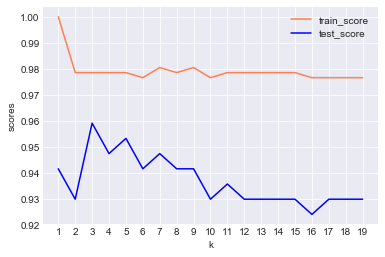

In [117]:
import seaborn as sns
sns.set_style('darkgrid')
k_range = range(1,20)
test_scores=[]
train_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    train_scores.append(knn.score(X_train,y_train))

plt.figure()
plt.xlabel('k')
plt.ylabel('scores')
plt.plot(k_range, train_scores,c='coral',label='train_score')
plt.plot(k_range,test_scores ,c='blue',label='test_score')
plt.xticks(range(1,20))
plt.legend()
plt.show()


High test scores were achieved at k=3 for both training and test data set.

In [118]:
#scores at k=3
print('Accuracy at k=3(training): {}'.format(train_scores[2]))
print('Accuracy at k=3(test): {}'.format(test_scores[2]))

Accuracy at k=3(training): 0.978515625
Accuracy at k=3(test): 0.9590643274853801


### How sensitive is k-NN classification accuracy to the weights in data?

In [119]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,y_train)
train_score=knn.score(X_train_scaled,y_train)
test_score=knn.score(X_test_scaled,y_test)
print('Accuracy score on training dataset after rescaling:{}'.format(train_score))
print('Accuracy score on test dataset after rescaling:{}'.format(test_score))

Accuracy score on training dataset after rescaling:0.978515625
Accuracy score on test dataset after rescaling:0.9590643274853801


Same accuracy scores were achieved, hence there is no skewed distribution in the data. There is no need for Normalizing.

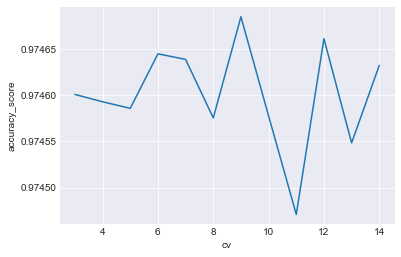

In [120]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = k)
scores=[]
for i in range(3,15):
    score=cross_val_score(knn,X_train,y_train,cv=i)
    scores.append(score.mean())
    
plt.figure()
plt.plot(range(3,15),scores)
plt.xlabel('cv')
plt.ylabel('accuracy_score')
plt.show()

## Transforming labels to binary

In [125]:
bin_label={2:1,4:0}
new_train=y_train.map(bin_label)
new_test=y_test.map(bin_label)

## Calculation recall score,precision score and confusion matrix

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,new_train)
y_predict=knn.predict(X_test)
conf_mat=confusion_matrix(new_test,y_predict)
print(conf_mat)

[[ 60   4]
 [  3 104]]


In [132]:
print('Recall Score: {}'.format(recall_score(new_test,y_predict)))
print('Precision score: {}'.format(precision_score(new_test,y_predict)))

Recall Score: 0.9719626168224299
Precision score: 0.9629629629629629


High Recall score shows that predictive model is working efficiently with very low False Negative cases(Type 2 error)